# $L_1$ and $L_2$ Norms

The standard n-dimensional RBF is roughly $e^{-r^2}$ where $r$ is the distance. Notice that this depends on the euclidean (aka $L_2$) norm. I.e. $r = x^2 + y^2$. We're interested in what kernel is the $L_1$ (Manhattan) norm?

Let's first look at the RBF kernel:

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import GPy
import numpy as np

 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


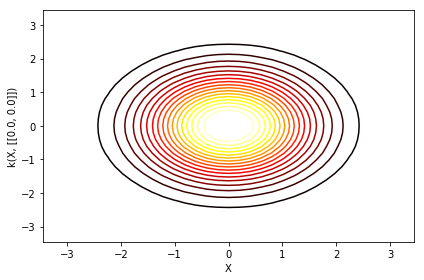

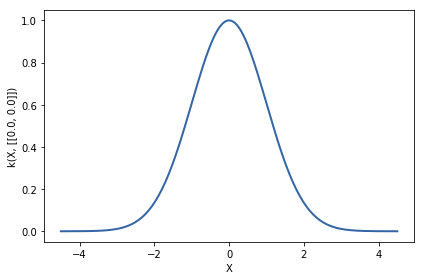

In [13]:
k = GPy.kern.RBF(2)
k.plot()
k.plot(visible_dims=[0])

We can see that, as expected the RBF depends on the $l_2$ distance.

What about the basic exponential kernel?

 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


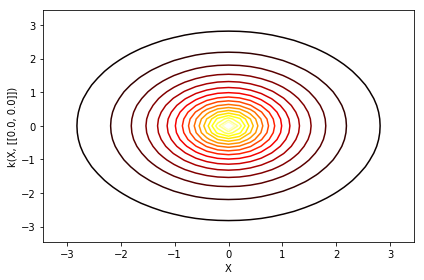

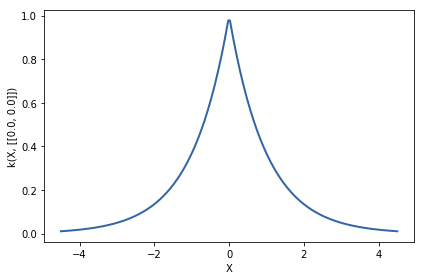

In [3]:
k = GPy.kern.Exponential(2)
k.plot()
k.plot(visible_dims=[0])

Although a different function, it's still a function of the $l_2$ distance. In this case $e^{-|r|}$.

We need to build the kernel as the product of exponential kernels; We want our distance to be $r = |x| + |y|$. So we want effectively to add the exponents of the exponential kernel, which is equivalent to multiplying the kernels:

$$e^{-|x|} e^{-|y|} = e^{-(|x| + |y|)}$$

where $x$ and $y$ are the distances along the two axes.

We demonstrate this below;

 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


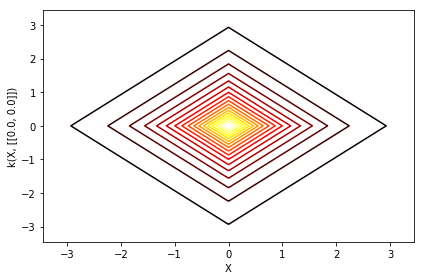

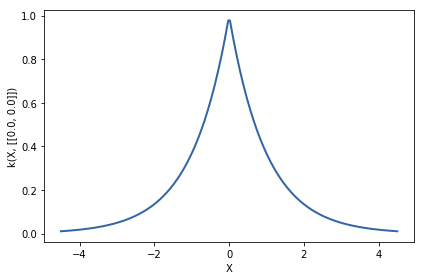

In [15]:
k = GPy.kern.Exponential(1,active_dims=[0])*GPy.kern.Exponential(1,active_dims=[1])
k.plot(x=0)
k.plot(visible_dims=[0],x=0)

As we expected the distance is now equal to the sum of the coordinates.

We can multiply the kernels together programmatically depending on the number of dimensions.

 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


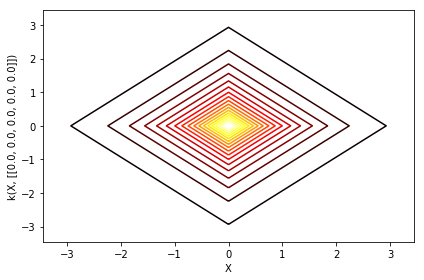

In [22]:
k = None
NumDim = 5
for d in range(NumDim):
    tempk = GPy.kern.Exponential(1,active_dims=[d])
    if k is None: 
        k = tempk
    else:
        k *= tempk
k.plot(visible_dims=[0,4],x=0)